# Importing required libraries

In [11]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,AveragePooling2D,Flatten
from keras import Sequential
from keras.datasets import mnist

### Splitting the dataset

In [12]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()


In [13]:
x_train.shape

(60000, 28, 28)

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
x_test.shape

(10000, 28, 28)

In [19]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [22]:
from PIL import Image

img = Image.fromarray(x_train[1])
img

### converting 28x28 image to 32x32 image

In [23]:
x_train = tensorflow.pad(x_train,[[0,0],[2,2],[2,2]])/255
x_test = tensorflow.pad(x_test,[[0,0],[2,2],[2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [26]:
x_train = tensorflow.expand_dims(x_train,axis=3,name=None)
x_test = tensorflow.expand_dims(x_test,axis=3,name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

### splitting the validation data from training data

In [27]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

### LeNet Architechture

In [28]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 120)              

In [37]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [38]:
history = model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_val,y_val)) 

Epoch 1/20
907/907 [==============================] - 14s 15ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0744 - val_accuracy: 0.9880
Epoch 2/20
907/907 [==============================] - 12s 13ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0633 - val_accuracy: 0.9900
Epoch 3/20
907/907 [==============================] - 12s 13ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0704 - val_accuracy: 0.9895
Epoch 4/20
907/907 [==============================] - 12s 13ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0689 - val_accuracy: 0.9935
Epoch 5/20
907/907 [==============================] - 12s 13ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0790 - val_accuracy: 0.9905
Epoch 6/20
907/907 [==============================] - 12s 13ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0658 - val_accuracy: 0.9915
Epoch 7/20
907/907 [==============================] - 13s 14ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0593 - val_accuracy:

In [39]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [40]:
y_pred = y_prob.argmax(axis=1)

### model accuracy

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9899

In [42]:
import matplotlib.pyplot as plt

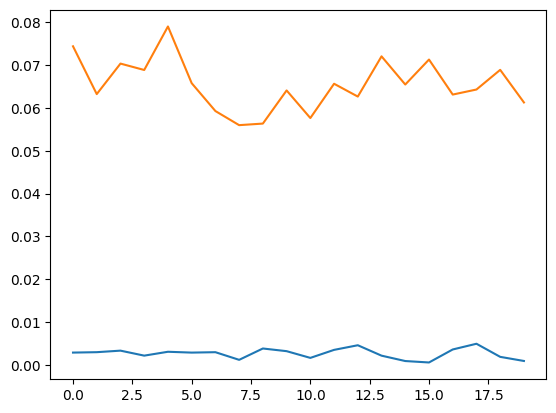

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])